# 6. Домашнее задание по теме
# Визуализация данных (MatPlotLib)
## Формулировка задания:
С помощью фреймворка MatPlotLib визуализировать результаты аналитики из домашнего задания №5.
## Планируемый результат:
В ноутбуке Colab под каждой аналитическим исследованием имеется графическое
изображение результатов исследования

## Описания плана работы:
Открыть ноутбук в Сolab из ДЗ №5.
Результаты п.8 с помощью matplotlib визуализировать.
Пример: Количество выживших и умерших в зависимости от возраста (*возраст берется в интервалах 10 лет)

## Перечень инструментов, необходимых для реализации деятельности:  
1) Google Colab https://colab.research.google.com/  
2) Matplotlib  

In [22]:
# подключение библиотек
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#чтоб не подключать диск с датасетом, загружаю по ссылке
import gdown
shareUrl = 'https://drive.google.com/file/d/1HtY8F6wKSBVn8CKSOOGmVDsynlAwhI7f/view?usp=sharing'
token = shareUrl[32:shareUrl.find('/view?usp=sharing')]
url = f'https://drive.google.com/uc?export=download&id={token}'
gdown.download(url, 'Titanic-Dataset.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1HtY8F6wKSBVn8CKSOOGmVDsynlAwhI7f
To: /content/Titanic-Dataset.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 3.57MB/s]


'Titanic-Dataset.csv'

In [24]:
# загрузка данных
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# 4. Определить количество пустых ячеек
print(df.isna().sum())
print(f'Total: {df.isna().sum().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total: 866


In [26]:
# посмотрим информацию по таблице
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [27]:
# 5. *Заполнить пустые ячейки используя любую логику замещения данных
# 6. Если пункт 5 не выполнен, то удалить строки имеющие пустые ячейки.
# для возраста возьмем среднее значение
# для порта первое значение
# каюту удалим т.к. большая часть значений пустая
df = df.fillna({'Age' : df.Age.mean()})
df = df.drop(labels='Cabin', axis=1)
df = df.fillna(method='ffill')
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [28]:
# добавлю новое поле для удобства поиска корреляции
sex_map = {'male' : 1,
           'female' : 0}
df['is_male'] = df['Sex'].map(sex_map)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [29]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,0.647587
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,0.477990
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,1.000000


<ipython-input-30-3b745cd5fda3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = df.corr();


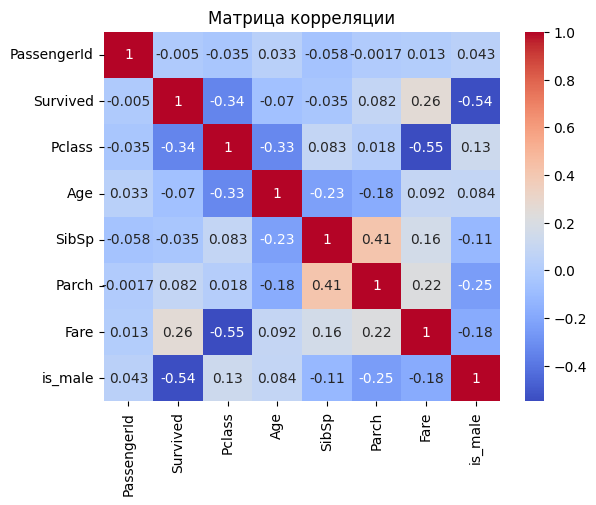

In [30]:
# 8. *С помощью аналитики определить влияние всех признаков на признак Survived (выживание).
# потстроим матрицу корреляций
matrix_corr = df.corr();

# вывод корреляционной матрицы
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm');
plt.title("Матрица корреляции")
plt.show()

In [31]:
print('При общем отношении ж-м')
print(df.groupby(['Sex']).size().transform(lambda x: x/x.sum()))
print('Среди выживших явно преобладает количество женщин')
print(df.groupby(['Survived', 'Sex']).size().transform(lambda x: x/x.sum()))

При общем отношении ж-м
Sex
female    0.352413
male      0.647587
dtype: float64
Среди выживших явно преобладает количество женщин
Survived  Sex   
0         female    0.090909
          male      0.525253
1         female    0.261504
          male      0.122334
dtype: float64


<Axes: xlabel='Survived,Sex'>

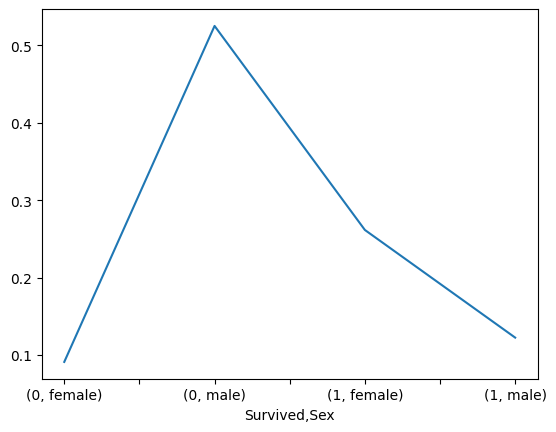

In [32]:
df.groupby(['Survived', 'Sex']).size().transform(lambda x: x/x.sum()).plot()

In [33]:
print('Схожая ситуация наблюдается по соотношениям выживших пассажиров более дорогого класса')
print(df.groupby(['Pclass']).size().transform(lambda x: x/x.sum()))
print(df.groupby(['Survived', 'Pclass']).size().transform(lambda x: x/x.sum()))

Схожая ситуация наблюдается по соотношениям выживших пассажиров более дорогого класса
Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64
Survived  Pclass
0         1         0.089787
          2         0.108866
          3         0.417508
1         1         0.152637
          2         0.097643
          3         0.133558
dtype: float64


<Axes: >

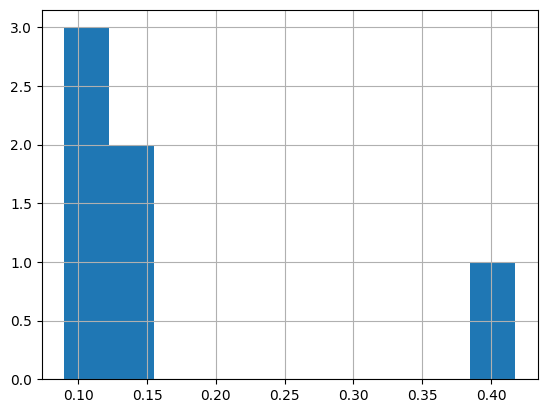

In [51]:
df.groupby(['Survived', 'Pclass']).size().transform(lambda x: x/x.sum()).hist()

In [34]:
print(df.groupby(['Parch']).size())
print(df.groupby(['Survived', 'Parch']).size())
print(df.groupby(['Survived', 'Parch']).size() / df.groupby(['Parch']).size())
print('Количество выживших одиночек - по отношению к изначальному их числу, наоборт показывает меньший процент выживания по сравнению с людей с детьми')

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64
Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
dtype: int64
Survived  Parch
0         0        0.656342
          1        0.449153
          2        0.500000
          3        0.400000
          4        1.000000
          5        0.800000
          6        1.000000
1         0        0.343658
          1        0.550847
          2        0.500000
          3        0.600000
          5        0.200000
dtype: float64
Количество выживших одиночек - по отношению к изначальному их числу, наоборт показывает меньший процент выживания по сравнению с людей с детьми


{'bodies': [<matplotlib.collections.PolyCollection at 0x790349883ca0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x790349883c40>,
 'cmins': <matplotlib.collections.LineCollection at 0x790349880940>,
 'cbars': <matplotlib.collections.LineCollection at 0x7903498a4520>}

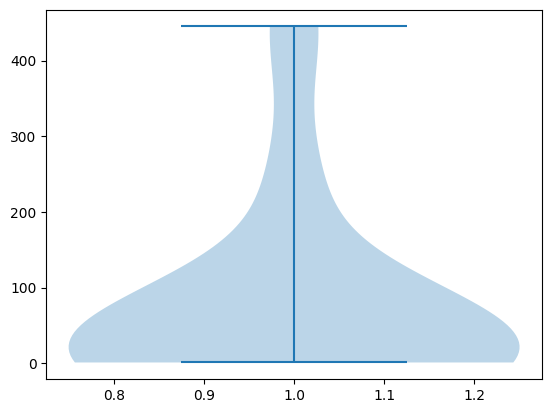

In [49]:
plt.violinplot(df.groupby(['Survived', 'Parch']).size())

In [35]:
print(df.groupby(['SibSp']).size())
print(df.groupby(['Survived', 'SibSp']).size())
print(df.groupby(['Survived', 'SibSp']).size() / df.groupby(['SibSp']).size())
print('Аналогичная ситуация и по соотношениям одиночек и семейных')

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64
Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
dtype: int64
Survived  SibSp
0         0        0.654605
          1        0.464115
          2        0.535714
          3        0.750000
          4        0.833333
          5        1.000000
          8        1.000000
1         0        0.345395
          1        0.535885
          2        0.464286
          3        0.250000
          4        0.166667
dtype: float64
Аналогичная ситуация и по соотношениям одиночек и семейных


In [36]:
#для удобства анализа возраста добавим возрастную группу
df['age_group'] = df['Age'].apply(lambda x: 0 if x < 7 else 1 if x <= 18 else 2 if x < 55 else 3 )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,2


In [37]:
print(df.groupby(['age_group']).size())
print(df.groupby(['Survived', 'age_group']).size())
print(df.groupby(['Survived', 'age_group']).size() / df.groupby(['age_group']).size())
print('По резултату видно что в первую очередь спасали детей и подростков')

age_group
0     47
1     92
2    710
3     42
dtype: int64
Survived  age_group
0         0             14
          1             55
          2            451
          3             29
1         0             33
          1             37
          2            259
          3             13
dtype: int64
Survived  age_group
0         0            0.297872
          1            0.597826
          2            0.635211
          3            0.690476
1         0            0.702128
          1            0.402174
          2            0.364789
          3            0.309524
dtype: float64
По резултату видно что в первую очередь спасали детей и подростков


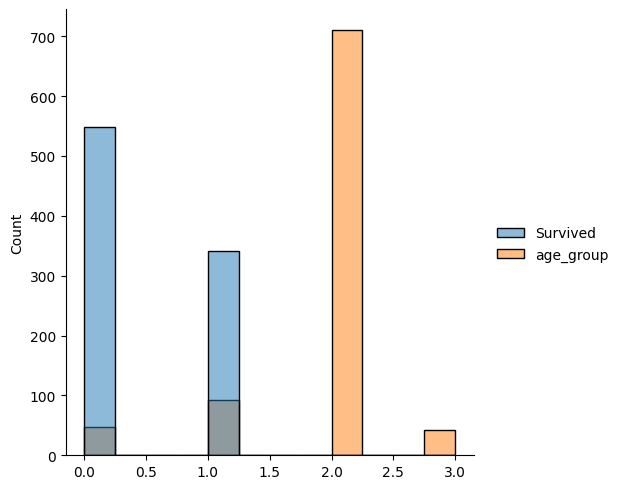

In [62]:
sns.displot(df[['Survived', 'age_group']])

```markdown
Поле     | Результат анализа на выживание
---------|-----------------------------------------------------
Pclass   | Класс круиза влияет на резальтат - чем выше класс тем больше шансов выжить
Sex      | Пол однозначно влияет на выживание - в первую очередь спасали женщин
Age      | Возраст повлиял на результаты выживания - в первую очередь спасали детей и подростков
SibSp    | По этому параметру верно обратное утверждение - у одиночки меньше шансов выжить
Parch    | По этому параметру верно обратное утверждение - у одиночки меньше шансов выжить

```